In [2]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import datetime
import statistics
import math
from scipy.stats import t
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import ttest_1samp, shapiro, anderson
from scipy.stats import t, probplot, ks_2samp, anderson_ksamp

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [93]:
df_2009 = pd.read_csv("2009_FINAL.csv")
df_2014 = pd.read_csv("2014_FINAL.csv")
df_2019 = pd.read_csv("2019_FINAL.csv")

# 2009 Market cap analysis 

In [94]:
l_cap_09 = pd.read_csv("lcap_2009.csv")
m_cap_09 = pd.read_csv("mcap_2009.csv")
s_cap_09 = pd.read_csv("scap_2009.csv")

In [95]:
column = l_cap_09['Ticker']

#Create a list for large cap tickers
lcap_tickers_09 = []

for row in column:
    words = row.split()
    lcap_tickers_09.append(words[0])

In [96]:
column2 = m_cap_09['Ticker']

#Create a list for mid cap tickers
mcap_tickers_09 = []

for row in column2:
    words = row.split()
    mcap_tickers_09.append(words[0])

In [97]:
column3 = s_cap_09['Ticker']

#Create a list for small cap tickers
scap_tickers_09 = []

for row in column3:
    words = row.split()
    scap_tickers_09.append(words[0])

In [98]:
df_2009

,event_id,company_id,stock_symbol,company_name,announce_datetime,fiscal_year,quarter,quarter_end_date,currency,amount_oc,time_class,announce_date,log_returns,impvol_1month_ATM,impvol_6month_ATM,vol_difference,actual-predicted_model1,actual-predicted_model2
0,3NN7AOIC,7785,NEOG,Neogen Corporation,2009-01-06 08:45:00,2009,Q2,11/30/2008,USD,0.26,BMO,2009-01-06,0.019426,71.8678,61.9152,9.9526,-6.464190,-0.930505
1,3NN74QQF,1431681901,AYI,Acuity Brands Inc.,2009-01-06 08:47:00,2009,Q1,11/30/2008,USD,0.48,BMO,2009-01-06,0.006202,86.7289,59.0580,27.6709,-14.012657,-7.367656
2,3NN7COBS,2446,SMSC,Standard Microsystems Corporation,2009-01-06 16:00:00,2009,Q3,11/30/2008,USD,0.39,AMC,2009-01-06,-0.111261,NaN,NaN,NaN,NaN,NaN
3,3NN78KRS,1431664636,GPN,"Global Payments, Inc.",2009-01-06 16:01:00,2009,Q2,11/30/2008,USD,0.60,AMC,2009-01-06,-0.044687,78.6194,53.8953,24.7241,-8.718473,-2.668529
4,3NN78CG1,985,FINL,"The Finish Line, Inc.",2009-01-06 16:15:00,2009,Q3,11/29/2008,USD,-0.16,AMC,2009-01-06,-0.057377,168.2129,97.8846,70.3283,-25.779299,-14.564320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,3NN78CG5,985,FINL,"The Finish Line, Inc.",2009-12-22 16:30:00,2010,Q3,11/28/2009,USD,0.12,AMC,2009-12-22,0.089841,61.1786,53.0305,8.1481,1.955968,6.631917
4612,3NN7C6T2,2012,PNY,Piedmont Natural Gas,2009-12-23 08:47:00,2009,Q4,10/31/2009,USD,NaN,BMO,2009-12-23,0.007590,20.1123,22.3004,-2.1881,NaN,NaN
4613,3NN75AL8,8072,CALM,Cal-Maine Foods Inc,2009-12-28 06:30:00,2010,Q2,11/28/2009,USD,0.67,BMO,2009-12-28,0.006148,43.2193,35.2440,7.9753,-5.148446,-1.687482
4614,3NN7ATX9,2110,NX,Quanex Building Products Corp.,2009-12-03 17:01:00,2009,Q4,10/31/2009,USD,0.41,AMC,2009-12-03,0.051960,45.9906,48.8929,-2.9023,NaN,NaN


In [99]:
lcap_df_2009 = df_2009[df_2009['stock_symbol'].isin(lcap_tickers_09)]
mcap_df_2009 = df_2009[df_2009['stock_symbol'].isin(mcap_tickers_09)]
scap_df_2009 = df_2009[df_2009['stock_symbol'].isin(scap_tickers_09)]

### Large cap price jump 2009

mean 0.001 std 0.055
2 sigma -0.109 and 0.111
The percentage of companies outside 2 sigma is 4.188%
The 10th percentile point is -0.054
The 90th percentile point is 0.059


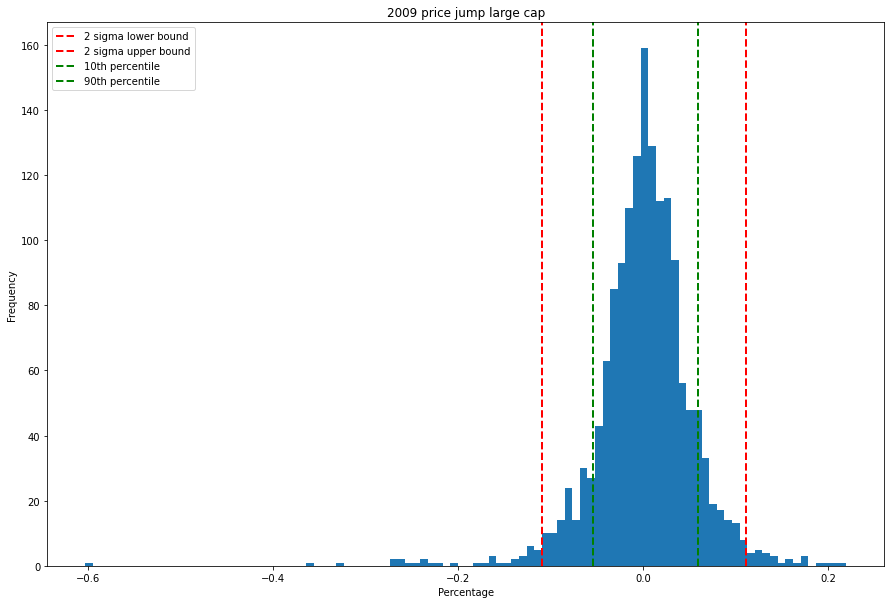

In [100]:
#drop NaN values
data = lcap_df_2009['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2009 price jump large cap')

plt.show()

### Mid cap price jump 2009

mean 0.004 std 0.054
2 sigma -0.105 and 0.112
The percentage of companies outside 2 sigma is 5.809%
The 10th percentile point is -0.060
The 90th percentile point is 0.067


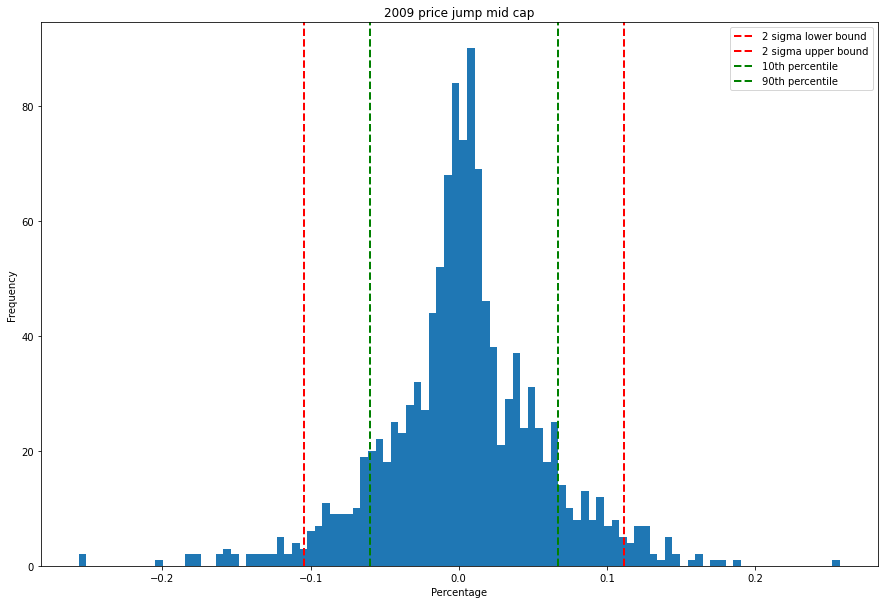

In [101]:
#drop NaN values
data = mcap_df_2009['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2009 price jump mid cap')

plt.show()

### Small cap price jump 2009

mean 0.001 std 0.069
2 sigma -0.137 and 0.140
The percentage of companies outside 2 sigma is 5.995%
The 10th percentile point is -0.074
The 90th percentile point is 0.078


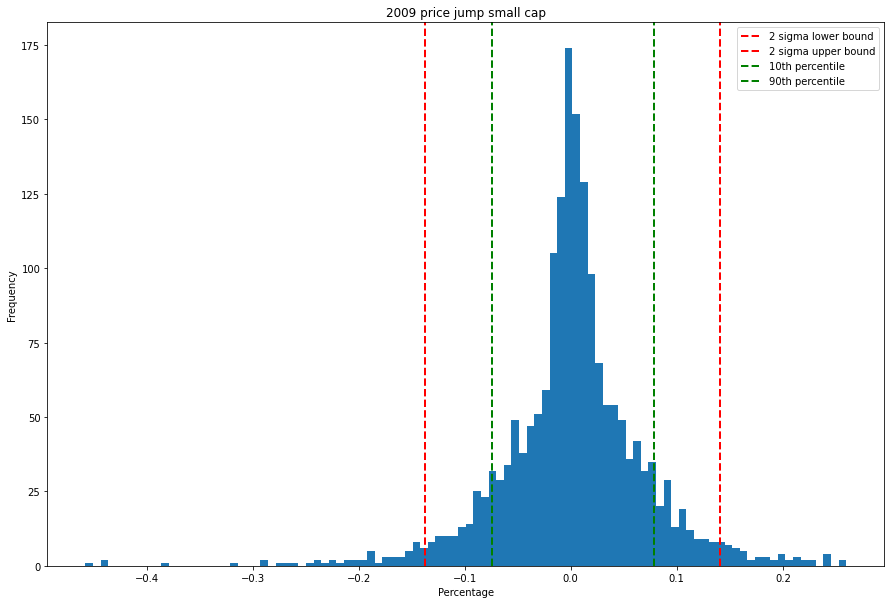

In [70]:
#drop NaN values
data = scap_df_2009['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2009 price jump small cap')

plt.show()

In [45]:
non_nan_count = lcap_df_2009['actual-predicted_model1'].count()
print("Number of non-NaN values lcap: ", non_nan_count)

non_nan_count = mcap_df_2009['actual-predicted_model1'].count()
print("Number of non-NaN values mcap: ", non_nan_count)

non_nan_count = scap_df_2009['actual-predicted_model1'].count()
print("Number of non-NaN values scap: ", non_nan_count)

Number of non-NaN values lcap:  1322
Number of non-NaN values mcap:  909
Number of non-NaN values scap:  1251


### Model 1 - market cap analysis

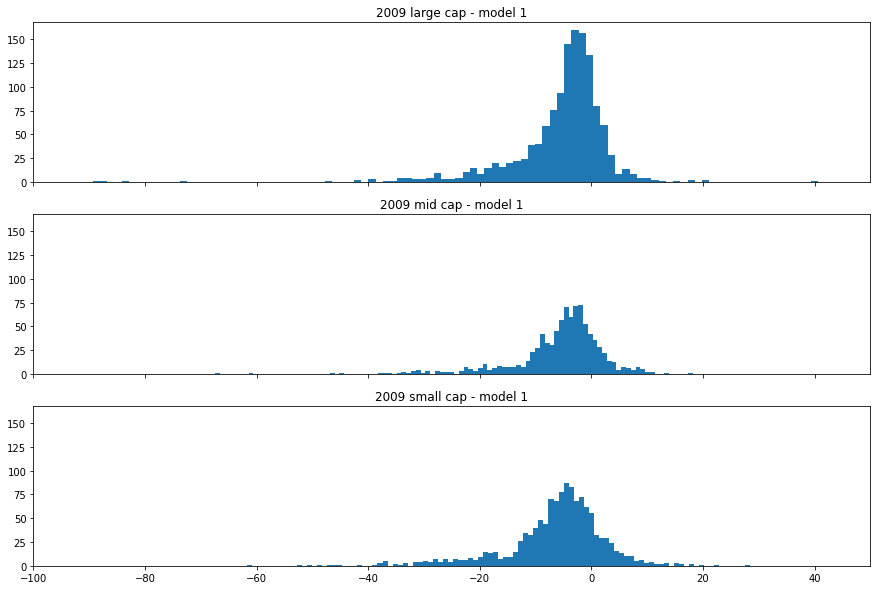

In [49]:
fig, axs = plt.subplots(3,1,figsize=(15, 10), sharey=True, sharex=True)

plt.xlim(-100, 50)

axs[0].hist(lcap_df_2009['actual-predicted_model1'].dropna(), bins=100)
axs[0].set_title('2009 large cap - model 1')

axs[1].hist(mcap_df_2009['actual-predicted_model1'].dropna(), bins=100)
axs[1].set_title('2009 mid cap - model 1')

axs[2].hist(scap_df_2009['actual-predicted_model1'].dropna(), bins=100)
axs[2].set_title('2009 small cap - model 1')

plt.show()

### Model 2 - market cap analysis

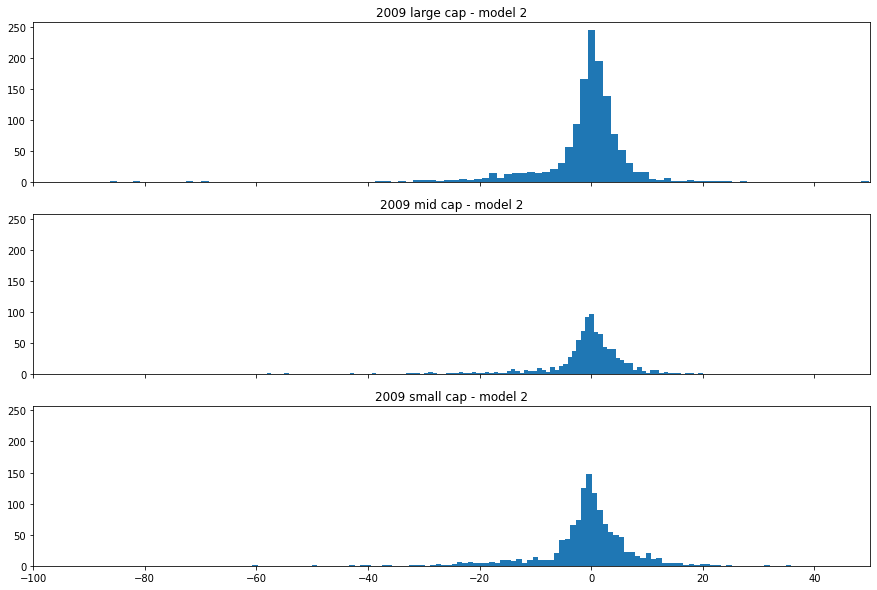

In [50]:
fig, axs = plt.subplots(3,1,figsize=(15, 10), sharey=True, sharex=True)

plt.xlim(-100, 50)

axs[0].hist(lcap_df_2009['actual-predicted_model2'].dropna(), bins=100)
axs[0].set_title('2009 large cap - model 2')

axs[1].hist(mcap_df_2009['actual-predicted_model2'].dropna(), bins=100)
axs[1].set_title('2009 mid cap - model 2')

axs[2].hist(scap_df_2009['actual-predicted_model2'].dropna(), bins=100)
axs[2].set_title('2009 small cap - model 2')

plt.show()

# 2014 - Market cap analysis 

In [102]:
df_2014

,event_id,company_id,stock_symbol,company_name,announce_datetime,fiscal_year,quarter,quarter_end_date,currency,amount_oc,time_class,announce_date,log_returns,impvol_1month_ATM,impvol_6month_ATM,vol_difference,actual-predicted_model1,actual-predicted_model2
0,3NN7ACWR,1495,LXK,Lexmark International Inc,2014-01-28 06:30:00,2013,Q4,12/31/2013,USD,1.18,BMO,2014-01-28,0.058939,42.1918,33.5900,8.6018,0.011710,3.410742
1,3NN7C2EP,2051,PCH,Potlatch Corporation,2014-01-28 06:30:00,2013,Q4,12/31/2013,USD,0.34,BMO,2014-01-28,-0.009631,25.1597,23.7643,1.3954,-0.940485,0.560272
2,3NN79303,1460,KLIC,Kulicke and Soffa Industries Inc,2014-01-28 06:55:00,2014,Q1,12/28/2013,USD,-0.03,BMO,2014-01-28,0.049672,38.1332,33.2336,4.8996,0.659039,3.552768
3,3NN7C0CO,6473,OSK,Oshkosh Corporation,2014-01-28 07:00:00,2014,Q1,12/31/2013,USD,0.63,BMO,2014-01-28,0.067500,43.8354,30.4455,13.3899,-0.515808,2.884717
4,3NN7EEIZ,1985,WAT,Waters Corporation,2014-01-28 07:00:00,2013,Q4,12/31/2013,USD,1.70,BMO,2014-01-28,0.057590,32.6126,24.6816,7.9310,0.847923,3.469541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,3NN74M5M,1431684339,ARE,Alexandria Real Estate Equities Inc.,2014-11-03 08:30:00,2014,Q3,09/30/2014,USD,1.20,BMO,2014-11-03,0.002887,14.6147,15.6158,-1.0011,NaN,NaN
4985,3NN76ZJK,9929,DXPE,DXP Enterprises Inc,2014-11-03 16:00:00,2014,Q3,09/30/2014,USD,1.14,AMC,2014-11-03,0.022990,73.1855,43.8100,29.3755,-11.207360,-6.181025
4986,3NN7DXQA,2542,SYKE,Sykes Enterprises Incorporated,2014-11-03 16:00:00,2014,Q3,09/30/2014,USD,0.45,AMC,2014-11-03,0.063808,47.6673,43.1793,4.4880,1.728805,5.085237
4987,3NN7CIVG,1431686046,SBRA,Sabra Health Care REIT Inc,2014-11-03 16:00:00,2014,Q3,09/30/2014,USD,0.60,AMC,2014-11-03,0.032509,23.9773,23.9773,0.0000,NaN,NaN


In [17]:
l_cap_14 = pd.read_csv("lcap_2014.csv")
m_cap_14 = pd.read_csv("mcap_2014.csv")
s_cap_14 = pd.read_csv("scap_2014.csv")

In [84]:
column = l_cap_14['Ticker']

#Create a list for large cap tickers
lcap_tickers_14 = []

for row in column:
    words = row.split()
    lcap_tickers_14.append(words[0])

In [85]:
column2 = m_cap_14['Ticker']

#Create a list for mid cap tickers
mcap_tickers_14 = []

for row in column2:
    words = row.split()
    mcap_tickers_14.append(words[0])

In [86]:
column3 = s_cap_14['Ticker']

#Create a list for small cap tickers
scap_tickers_14 = []

for row in column3:
    words = row.split()
    scap_tickers_14.append(words[0])

In [58]:
lcap_df_2014 = df_2014[df_2014['stock_symbol'].isin(lcap_tickers_14)]
mcap_df_2014 = df_2014[df_2014['stock_symbol'].isin(mcap_tickers_14)]
scap_df_2014 = df_2014[df_2014['stock_symbol'].isin(scap_tickers_14)]

### Large cap price jump 2014

mean 0.001 std 0.037
2 sigma -0.073 and 0.074
The percentage of companies outside 2 sigma is 4.904%
The 10th percentile point is -0.038
The 90th percentile point is 0.039


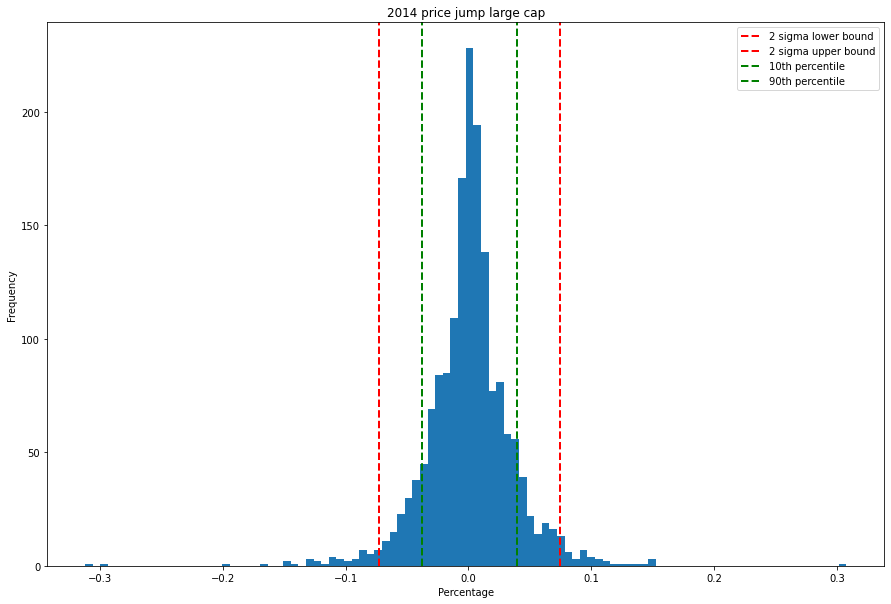

In [62]:
#drop NaN values
data = lcap_df_2014['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2014 price jump large cap')

plt.show()

### Mid cap price jump 2014

mean -0.001 std 0.045
2 sigma -0.091 and 0.090
The percentage of companies outside 2 sigma is 4.969%
The 10th percentile point is -0.048
The 90th percentile point is 0.046


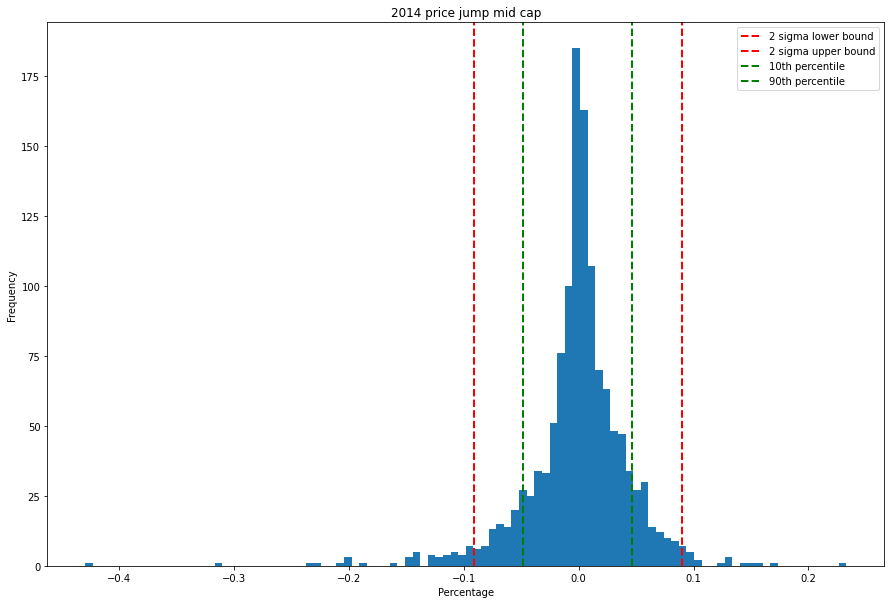

In [65]:
#drop NaN values
data = mcap_df_2014['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2014 price jump mid cap')

plt.show()

### Small cap price jump 2014

mean -0.002 std 0.052
2 sigma -0.107 and 0.103
The percentage of companies outside 2 sigma is 6.762%
The 10th percentile point is -0.059
The 90th percentile point is 0.055


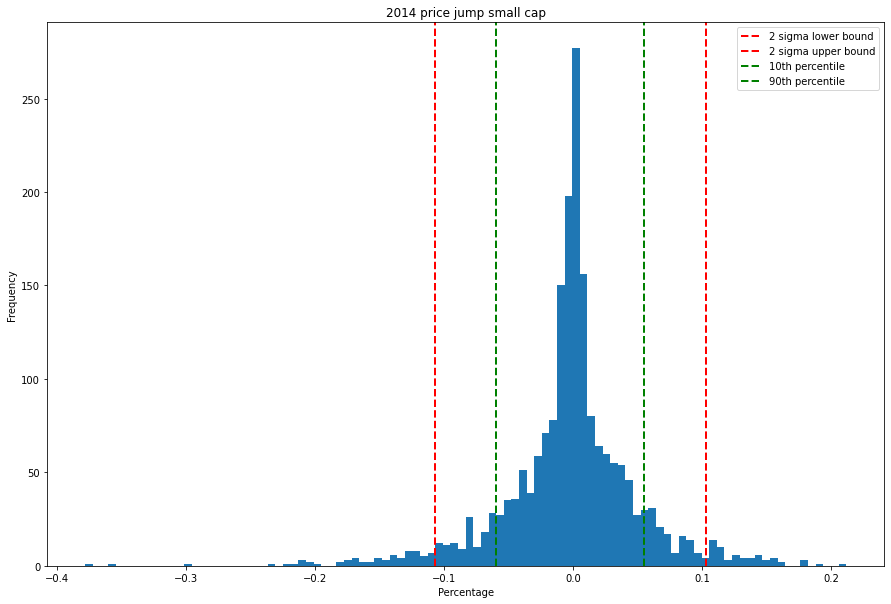

In [66]:
#drop NaN values
data = scap_df_2014['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2014 price jump small cap')

plt.show()

In [67]:
non_nan_count = lcap_df_2014['actual-predicted_model1'].count()
print("Number of non-NaN values lcap: ", non_nan_count)

non_nan_count = mcap_df_2014['actual-predicted_model1'].count()
print("Number of non-NaN values mcap: ", non_nan_count)

non_nan_count = scap_df_2014['actual-predicted_model1'].count()
print("Number of non-NaN values scap: ", non_nan_count)

Number of non-NaN values lcap:  1594
Number of non-NaN values mcap:  1213
Number of non-NaN values scap:  1695


### Model 1 - Market cap analysis 

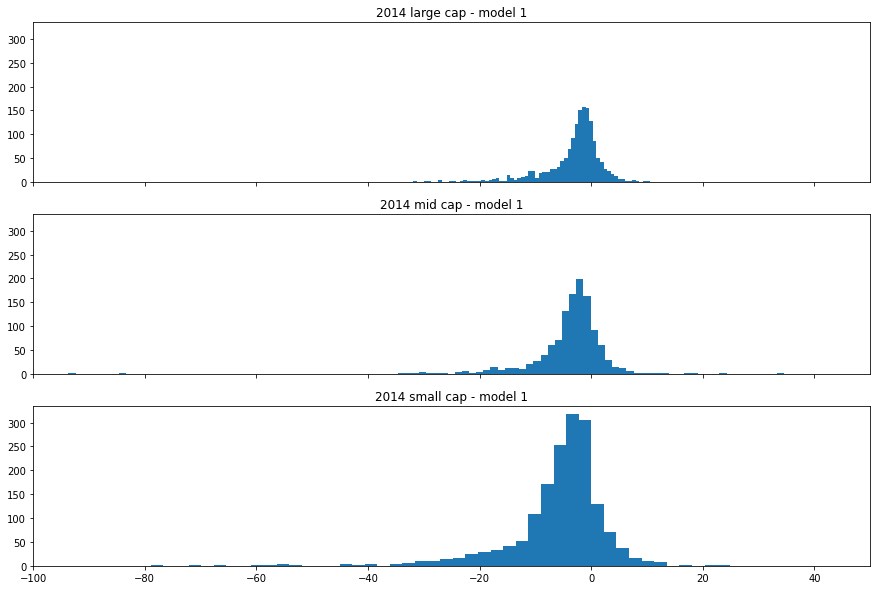

In [47]:
fig, axs = plt.subplots(3,1, figsize=(15, 10), sharey=True, sharex=True)

plt.xlim(-100, 50)

axs[0].hist(lcap_df_2014['actual-predicted_model1'].dropna(), bins=100)
axs[0].set_title('2014 large cap - model 1')

axs[1].hist(mcap_df_2014['actual-predicted_model1'].dropna(), bins=100)
axs[1].set_title('2014 mid cap - model 1')

axs[2].hist(scap_df_2014['actual-predicted_model1'].dropna(), bins=100)
axs[2].set_title('2014 small cap - model 1')

plt.show()

### Model 2 - market cap analysis

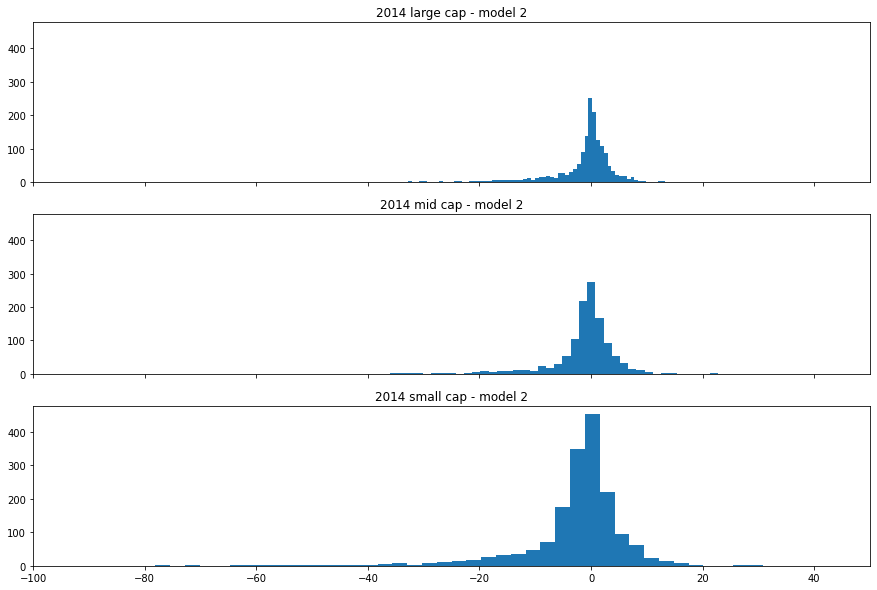

In [71]:
fig, axs = plt.subplots(3,1, figsize=(15, 10), sharey=True, sharex=True)

plt.xlim(-100, 50)

axs[0].hist(lcap_df_2014['actual-predicted_model2'].dropna(), bins=100)
axs[0].set_title('2014 large cap - model 2')

axs[1].hist(mcap_df_2014['actual-predicted_model2'].dropna(), bins=100)
axs[1].set_title('2014 mid cap - model 2')

axs[2].hist(scap_df_2014['actual-predicted_model2'].dropna(), bins=100)
axs[2].set_title('2014 small cap - model 2')

plt.show()

# 2019 - Market cap analysis

In [103]:
df_2019

,event_id,company_id,stock_symbol,isin,company_name,announce_datetime,fiscal_year,quarter,quarter_end_date,currency,time_class,announce_date,log_returns,impvol_1month_ATM,impvol_6month_ATM,vol_difference,actual-predicted_model1,actual-predicted_model2
0,3VOH046Q,1431693068,SMPL,US82900L1026,The Simply Good Foods Company,2019-01-03 07:00:00,2019,Q1,11/24/2018,USD,BMO,2019-01-03,0.055152,64.2479,44.6513,19.5966,-5.127774,-0.141869
1,3VNW03VA,2225,RPM,US7496851038,RPM International Inc.,2019-01-04 06:45:00,2019,Q2,11/30/2018,USD,BMO,2019-01-04,-0.004105,42.6408,27.4541,15.1867,-7.106358,-3.973555
2,3VLS03V1,1431683023,ANGO,US03475V1017,AngioDynamics Inc.,2019-01-04 07:00:00,2019,Q2,11/30/2018,USD,BMO,2019-01-04,0.035765,68.0880,36.3143,31.7737,-9.692832,-5.595795
3,3VOI040N,670,CMC,US2017231034,Commercial Metals Co.,2019-01-07 06:45:00,2019,Q1,11/30/2018,USD,BMO,2019-01-07,0.068677,69.0623,41.4289,27.6334,-5.862669,-1.109389
4,3VQL04E8,1431684442,TEL,CH0102993182,TE Connectivity Ltd.,2019-01-23 06:00:00,2019,Q1,12/28/2018,USD,BMO,2019-01-23,-0.031700,27.9183,23.5660,4.3523,-0.278708,1.913599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,43E8042T,1431685785,KNX,US4990491049,Knight-Swift Transportation Holdings Inc.,2020-01-29,2019,Q4,12/31/2019,USD,BMO,2020-01-29,0.067886,41.6709,37.3426,4.3283,2.528025,5.539134
4337,43DO03VJ,1431692060,SGH,KYG8232Y1017,"SMART Global Holdings, Inc.",2019-12-19 16:05:00,2020,Q1,11/29/2019,USD,AMC,2019-12-19,-0.037930,264.3048,54.7000,209.6048,-55.781294,-56.714712
4338,43BH03VT,1790,NKE,US6541061031,Nike Inc.,2019-12-19 16:15:00,2020,Q2,11/30/2019,USD,AMC,2019-12-19,-0.001484,101.9178,22.9935,78.9243,-22.726842,-22.635078
4339,43GD04J4,2862,X,US9129091081,United States Steel Corp.,2020-01-29 16:00:00,2019,Q4,12/31/2019,USD,AMC,2020-01-29,-0.004301,69.0970,54.8683,14.2287,-9.245810,-3.677363


In [73]:
l_cap_19 = pd.read_csv("lcap_2019.csv")
m_cap_19 = pd.read_csv("mcap_2019.csv")
s_cap_19 = pd.read_csv("scap_2019.csv")

In [77]:
column = l_cap_19['Ticker']

# Create an list for large cap tickers
lcap_tickers_19 = []

for row in column:
    words = row.split()
    lcap_tickers_19.append(words[0])

In [78]:
column2 = m_cap_19['Ticker']

# Create an list for mid cap tickers
mcap_tickers_19 = []

for row in column2:
    words = row.split()
    mcap_tickers_19.append(words[0])

In [79]:
column3 = s_cap_19['Ticker']

# Create an list for small cap tickers
scap_tickers_19 = []

for row in column3:
    words = row.split()
    scap_tickers_19.append(words[0])

In [80]:
lcap_df_2019 = df_2019[df_2019['stock_symbol'].isin(lcap_tickers_19)]
mcap_df_2019 = df_2019[df_2019['stock_symbol'].isin(mcap_tickers_19)]
scap_df_2019 = df_2019[df_2019['stock_symbol'].isin(scap_tickers_19)]

### Large cap price jump 2019

mean -0.008 std 0.082
2 sigma -0.173 and 0.157
The percentage of companies outside 2 sigma is 5.191%
The 10th percentile point is -0.091
The 90th percentile point is 0.068


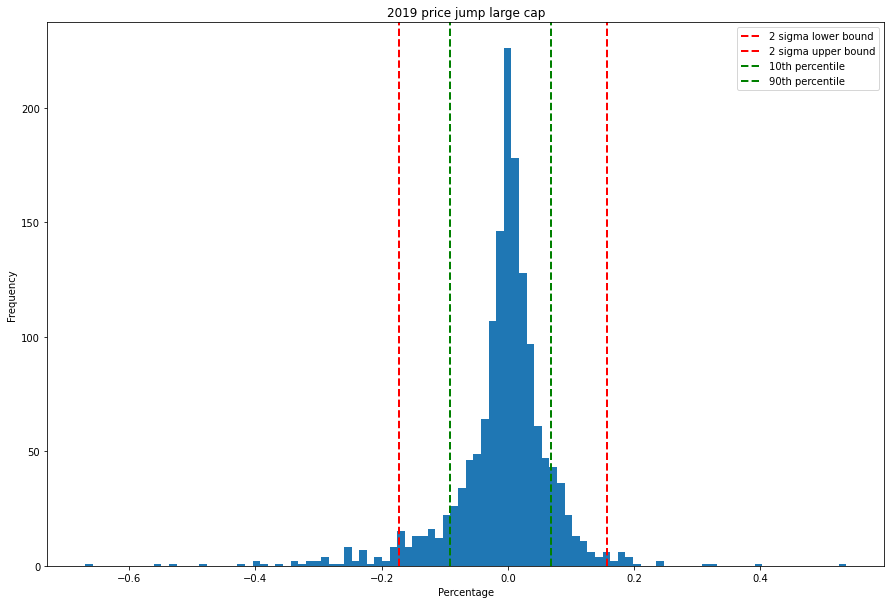

In [87]:
#drop NaN values
data = lcap_df_2019['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2019 price jump large cap')

plt.show()

### Mid cap price jump 2019

mean -0.003 std 0.096
2 sigma -0.196 and 0.189
The percentage of companies outside 2 sigma is 5.350%
The 10th percentile point is -0.099
The 90th percentile point is 0.081


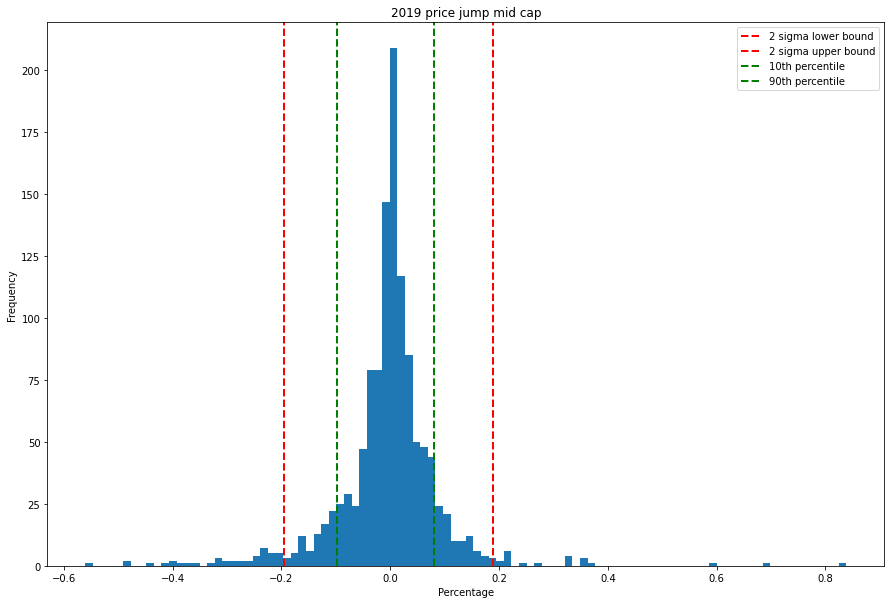

In [88]:
#drop NaN values
data = mcap_df_2019['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2019 price jump mid cap')

plt.show()

### Small cap price jump 2019

mean -0.010 std 0.127
2 sigma -0.263 and 0.243
The percentage of companies outside 2 sigma is 5.237%
The 10th percentile point is -0.159
The 90th percentile point is 0.100


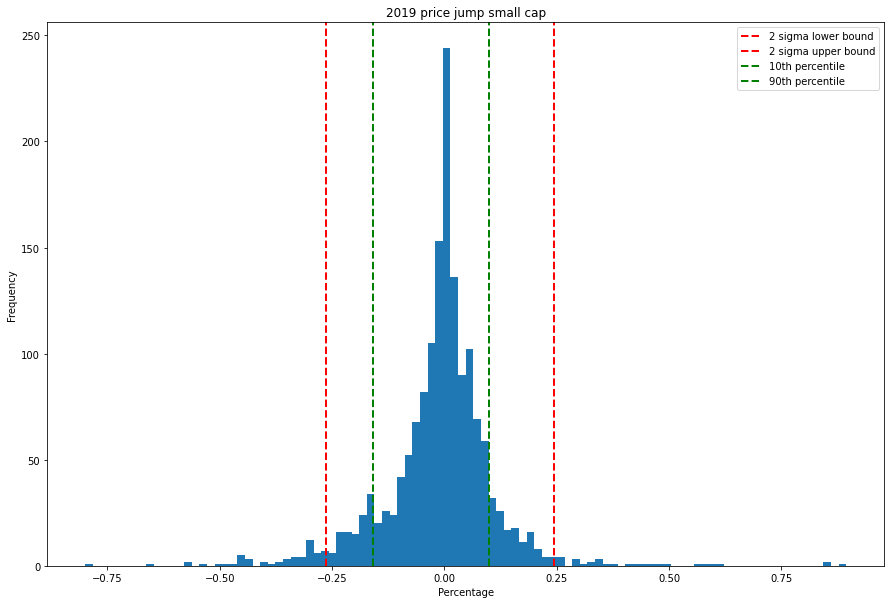

In [89]:
#drop NaN values
data = scap_df_2019['log_returns'].dropna()

mean = data.mean()
std_dev = data.std()
lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev
outside_2_sigma = data[(data < lower_bound) | (data > upper_bound)]
percentage_outside_2_sigma = (len(outside_2_sigma) / len(data)) * 100
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(f"mean {mean:.3f} std {std_dev:.3f}")
print(f"2 sigma {lower_bound:.3f} and {upper_bound:.3f}")
print(f"The percentage of companies outside 2 sigma is {percentage_outside_2_sigma:.3f}%")
print(f"The 10th percentile point is {percentile_10:.3f}")
print(f"The 90th percentile point is {percentile_90:.3f}")

#Create a df with only the tail events
events_outside_2_sigma = outside_2_sigma.tolist()
tail_data_2014 = df_2014[df_2014['log_returns'].isin(outside_2_sigma)]

#Plot histogram
plt.figure(figsize=(15, 10))
plt.hist(data, bins=100)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(percentile_10, color='g', linestyle='dashed', linewidth=2)
plt.axvline(percentile_90, color='g', linestyle='dashed', linewidth=2)

plt.legend(['2 sigma lower bound', '2 sigma upper bound', '10th percentile', '90th percentile'])
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('2019 price jump small cap')

plt.show()

In [90]:
non_nan_count = lcap_df_2019['actual-predicted_model1'].count()
print("Number of non-NaN values lcap: ", non_nan_count)

non_nan_count = mcap_df_2019['actual-predicted_model1'].count()
print("Number of non-NaN values mcap: ", non_nan_count)

non_nan_count = scap_df_2019['actual-predicted_model1'].count()
print("Number of non-NaN values scap: ", non_nan_count)

Number of non-NaN values lcap:  1476
Number of non-NaN values mcap:  1167
Number of non-NaN values scap:  1460


### Model 1 - market cap analysis

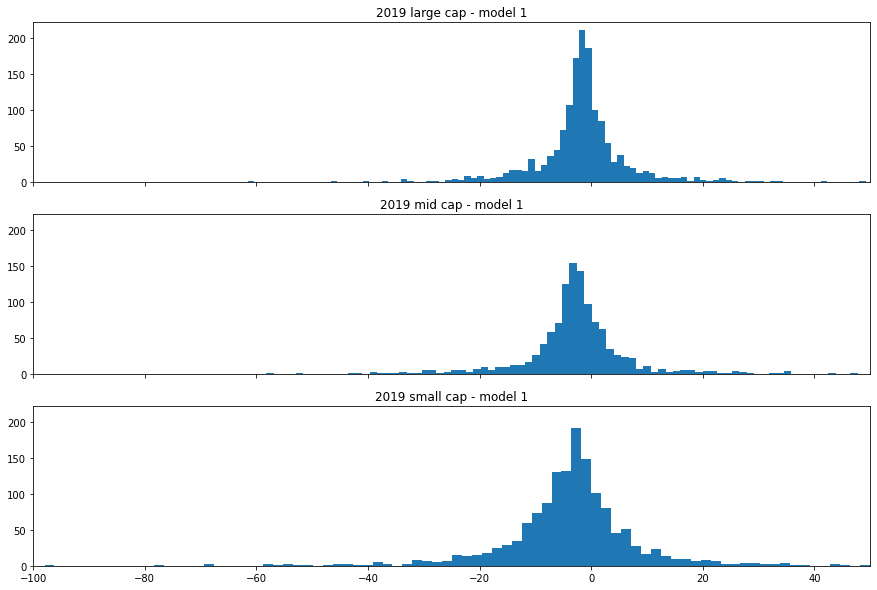

In [91]:
fig, axs = plt.subplots(3,1, figsize=(15, 10), sharey=True, sharex=True)

plt.xlim(-100, 50)

axs[0].hist(lcap_df_2019['actual-predicted_model1'].dropna(), bins=100)
axs[0].set_title('2019 large cap - model 1')

axs[1].hist(mcap_df_2019['actual-predicted_model1'].dropna(), bins=100)
axs[1].set_title('2019 mid cap - model 1')

axs[2].hist(scap_df_2019['actual-predicted_model1'].dropna(), bins=100)
axs[2].set_title('2019 small cap - model 1')

plt.show()

### Model 2 - market cap analysis

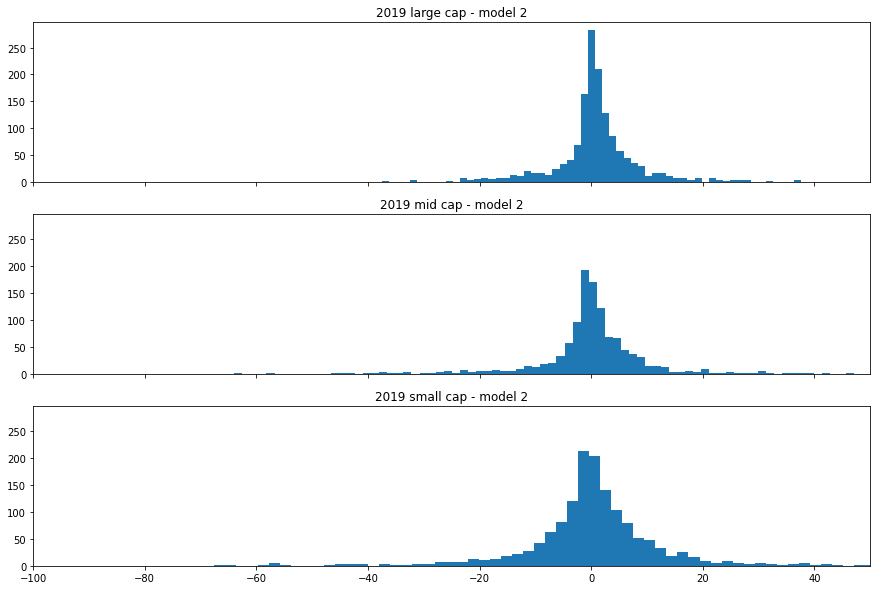

In [92]:
fig, axs = plt.subplots(3,1, figsize=(15, 10), sharey=True, sharex=True)

plt.xlim(-100, 50)

axs[0].hist(lcap_df_2019['actual-predicted_model2'].dropna(), bins=100)
axs[0].set_title('2019 large cap - model 2')

axs[1].hist(mcap_df_2019['actual-predicted_model2'].dropna(), bins=100)
axs[1].set_title('2019 mid cap - model 2')

axs[2].hist(scap_df_2019['actual-predicted_model2'].dropna(), bins=100)
axs[2].set_title('2019 small cap - model 2')

plt.show()